In [1]:
import chardet

paris_weather_path = "Paris_weather_data_2017.csv" # paris weather data path

with open(paris_weather_path, "rb") as f:
    raw_data = f.read(10000) # opening the file to check what encoder I should use due to encoding errors with utf-8
    
encoding_result = chardet.detect(raw_data) # detecting encoding
encoding_result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [2]:
# importing paris weather data
import pandas as pd
paris_weather_data = pd.read_csv(paris_weather_path, encoding = encoding_result["encoding"])

In [3]:
# display df
paris_weather_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,1/5/2017,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,...,987,982,31.0,12.0,6.0,39,24,58,4,Rain
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,...,1005,999,31.0,16.0,10.0,19,13,-,0,NaN
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,...,1006,1000,31.0,12.0,3.0,32,13,47,12,"Rain , Thunderstorm"
363,12/30/2017,14,10,6,12,10,4,100,87,73,...,1006,1000,19.0,9.0,3.0,32,19,55,3,Rain


In [4]:
paris_weather_data['Date'] = pd.to_datetime(paris_weather_data['Date'])

In [5]:
# finding the real column names for future manipulation
paris_weather_data.columns.tolist()

['Date',
 'high Temp.\xa0(°C)',
 'avg Temp.\xa0(°C)',
 'low Temp.\xa0(°C)',
 'high Dew Point\xa0(°C)',
 'avg Dew Point\xa0(°C)',
 'low Dew Point\xa0(°C)',
 'high Humidity\xa0(%)',
 'avg Humidity\xa0(%)',
 'low Humidity\xa0(%)',
 'high Sea Level Press.\xa0(hPa)',
 'avg Sea Level Press.\xa0(hPa)',
 'low Sea Level Press.\xa0(hPa)',
 'high Visibility\xa0(km)',
 'avg Visibility\xa0(km)',
 'low Visibility\xa0(km)',
 'high Wind\xa0(km/h)',
 'avg Wind\xa0(km/h)',
 'high Gust Wind\xa0(km/h)',
 'sum Precip.\xa0(mm)',
 'Events']

In [6]:
# dropping the high Gust Wind due to various "-" and "NaN" values
paris_weather_data = paris_weather_data.drop("high Gust Wind\xa0(km/h)", axis = 1)

In [7]:
paris_weather_data = paris_weather_data.interpolate()

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_27194/2376579342.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  paris_weather_data = paris_weather_data.interpolate()


In [8]:
# checking the Events tab
paris_weather_data["Events"].unique()

array(['Fog', 'Fog , Rain , Snow', 'Rain', nan, 'Fog , Rain',
       'Rain , Snow', 'Fog , Snow', 'Snow', 'Rain , Thunderstorm',
       'Fog , Rain , Thunderstorm', 'Rain , Snow , Hail'], dtype=object)

In [9]:
# Encoding the Events column to numerical format for ML processing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
paris_weather_data["Events"] = label_encoder.fit_transform(paris_weather_data["Events"].astype(str))

In [10]:
# checking NaNs in dataframe
paris_weather_data.isna().sum()

Date                           0
high Temp. (°C)                0
avg Temp. (°C)                 0
low Temp. (°C)                 0
high Dew Point (°C)            0
avg Dew Point (°C)             0
low Dew Point (°C)             0
high Humidity (%)              0
avg Humidity (%)               0
low Humidity (%)               0
high Sea Level Press. (hPa)    0
avg Sea Level Press. (hPa)     0
low Sea Level Press. (hPa)     0
high Visibility (km)           0
avg Visibility (km)            0
low Visibility (km)            0
high Wind (km/h)               0
avg Wind (km/h)                0
sum Precip. (mm)               0
Events                         0
dtype: int64

In [11]:
# calculating correlation matrix without the date column
corr_matrix = paris_weather_data.drop("Date", axis = 1).corr()

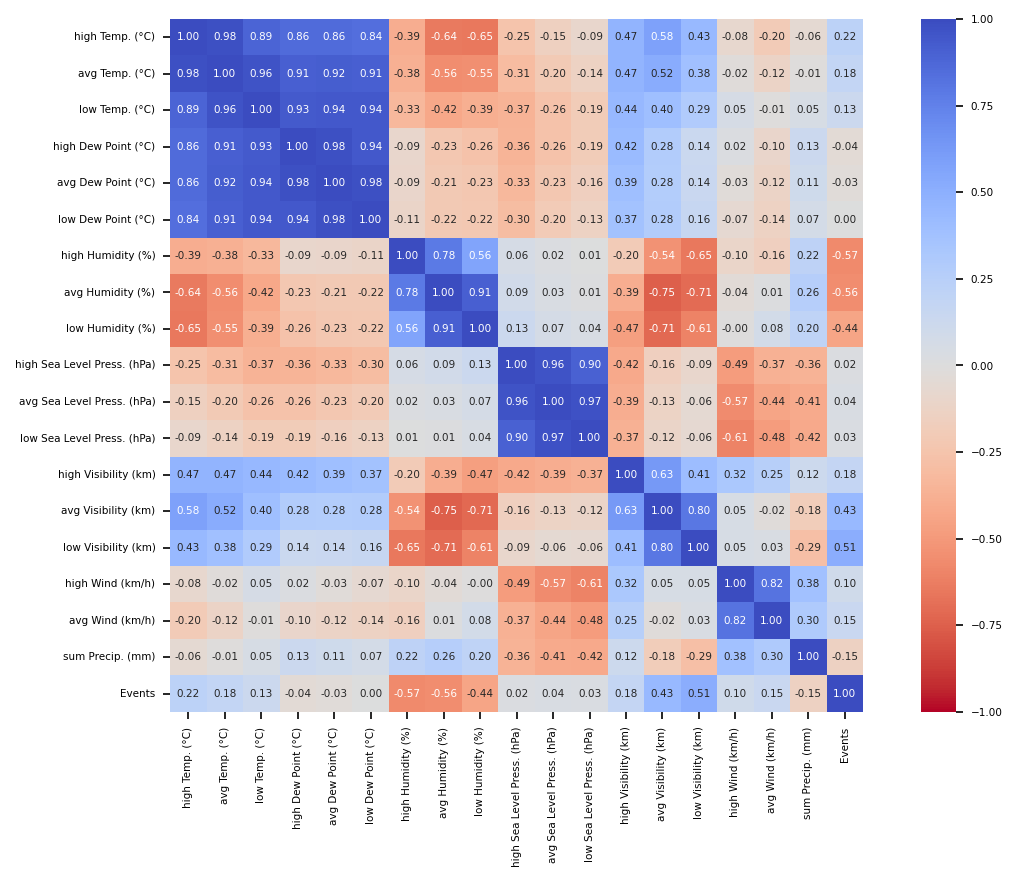

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# create matplotlib figure and set font size
plt.rcParams["font.size"] = 5

plt.figure(figsize=(10, 6),
          dpi = 150)
#sns.set(font_scale = 1)

# heatmap using sns, using coolwarm as the color map and rounding values to the nearest hundredth
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'coolwarm_r',
            vmin = -1,
            vmax = 1,
            square = True,
            fmt = ".2f")

plt.show()

In [13]:
# importing excel file for electricity consumption
electricity_consumption_path = "Historique_consommation_JOUR_2017.xls"
electricity_consumption = pd.read_excel(electricity_consumption_path, skiprows = 17) # skipping first 17 rows because they're empty/comments
electricity_consumption

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01/01/2017,Définitives,1652084.0
2,NaN,NaN,NaN,02/01/2017,Définitives,1768332.0
3,NaN,NaN,NaN,03/01/2017,Définitives,1886120.0
4,NaN,NaN,NaN,04/01/2017,Définitives,1923775.0
...,...,...,...,...,...,...
372,NaN,NaN,NaN,27/12/2017,Définitives,1582970.0
373,NaN,NaN,NaN,28/12/2017,Définitives,1664743.0
374,NaN,NaN,NaN,29/12/2017,Définitives,1668623.0
375,NaN,NaN,NaN,30/12/2017,Définitives,1437082.0


In [14]:
# dropping the empty columns
for column in electricity_consumption.columns:
    
    if "Unnamed" in column:
        electricity_consumption = electricity_consumption.drop(column, axis = 1)

In [15]:
electricity_consumption = electricity_consumption.dropna().reset_index(drop = True)

In [16]:
electricity_consumption = electricity_consumption.drop(columns = "Type de données", axis = 1)

In [17]:
electricity_consumption

,Date,Energie journalière (MWh)
0,01/01/2017,1652084.0
1,02/01/2017,1768332.0
2,03/01/2017,1886120.0
3,04/01/2017,1923775.0
4,05/01/2017,1887470.0
...,...,...
360,27/12/2017,1582970.0
361,28/12/2017,1664743.0
362,29/12/2017,1668623.0
363,30/12/2017,1437082.0


In [18]:
paris_weather_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Events
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,5
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4,5
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0,10
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12,8
363,2017-12-30,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3,5


In [19]:
# selecting the temperature and date
paris_temp = paris_weather_data[["Date","avg Temp.\xa0(°C)"]]

In [20]:
# changing the date column to datetime, just to ensure that they are in datetime
paris_temp.loc[:, "Date"] = pd.to_datetime(paris_temp["Date"])

In [21]:
# validating type
paris_temp["Date"].dtype

dtype('<M8[ns]')

In [22]:
# changing the date column to datetime, just to ensure that they are in datetime
electricity_consumption["Date"] = pd.to_datetime(electricity_consumption["Date"], dayfirst = True)

In [23]:
# merging both dataframes, consumption and temperature, on datetime
consumption_vs_temp = pd.merge(paris_temp, electricity_consumption)

In [24]:
consumption_vs_temp

,Date,avg Temp. (°C),Energie journalière (MWh)
0,2017-01-01,-3,1652084.0
1,2017-01-02,0,1768332.0
2,2017-01-03,0,1886120.0
3,2017-01-04,2,1923775.0
4,2017-01-05,3,1887470.0
...,...,...,...
360,2017-12-27,4,1582970.0
361,2017-12-28,2,1664743.0
362,2017-12-29,3,1668623.0
363,2017-12-30,10,1437082.0


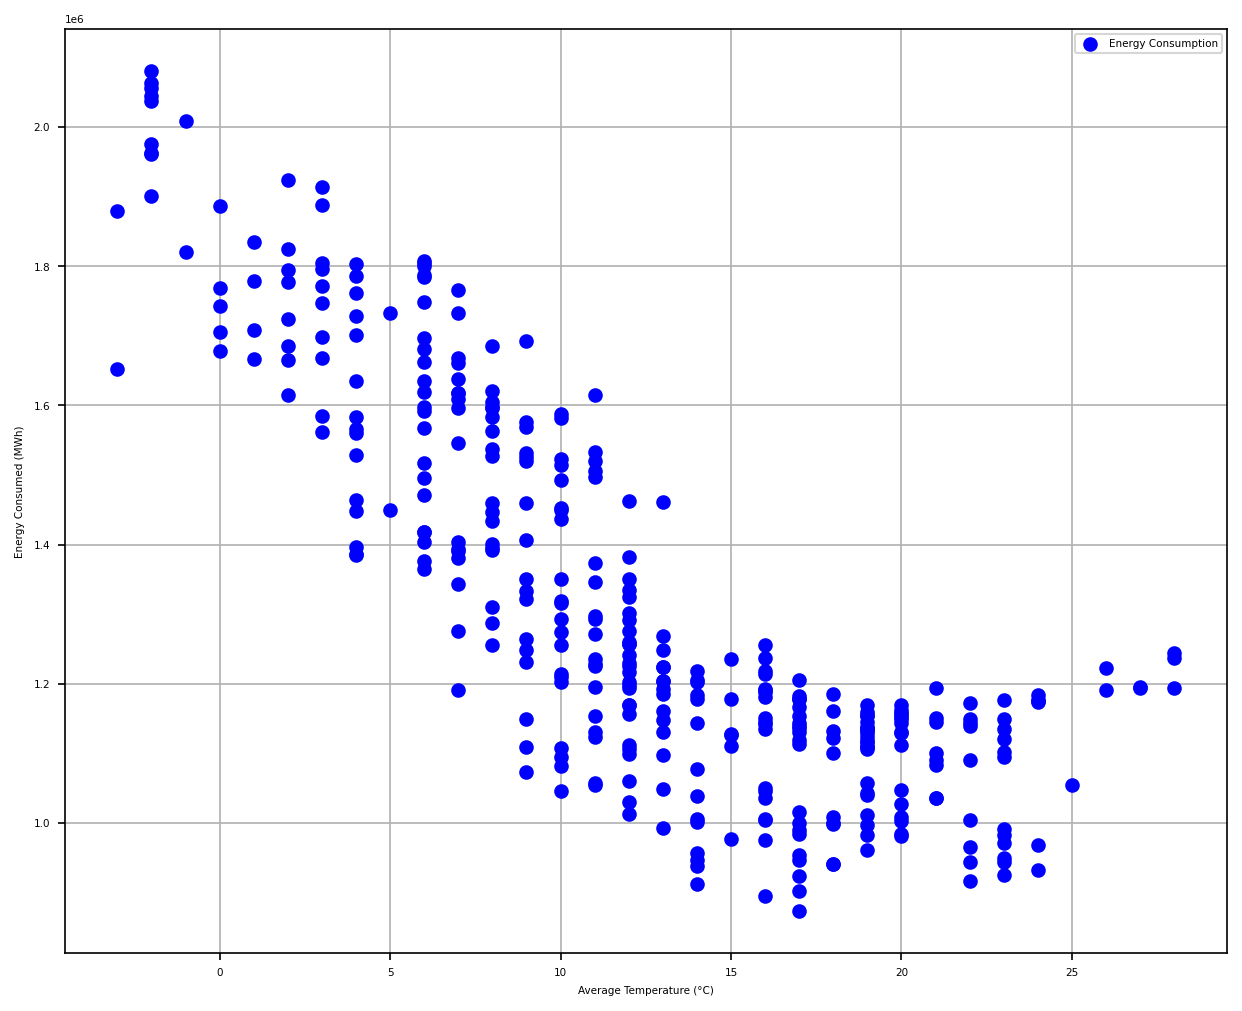

In [25]:
plt.figure(figsize=(10, 8),
          dpi = 150)

plt.scatter(consumption_vs_temp["avg Temp.\xa0(°C)"], consumption_vs_temp["Energie journalière (MWh)"],
            color = "blue",
           zorder = 3,
           label = "Energy Consumption")

plt.xlabel("Average Temperature (°C)")
plt.ylabel("Energy Consumed (MWh)")
plt.grid(True, zorder = 0)
plt.legend()

plt.show()

In [26]:
import scipy as scp

In [27]:
# performing t-test to verify that the relationship is not by luck
t_test = scp.stats.ttest_ind(consumption_vs_temp["avg Temp.\xa0(°C)"], consumption_vs_temp["Energie journalière (MWh)"])
t_test

TtestResult(statistic=-90.12156447444656, pvalue=0.0, df=728.0)

In [28]:
print(f"p-value: {t_test[1]:.10f}")

p-value: 0.0000000000


In [29]:
import numpy as np

In [30]:
# fitting a quadratic to the data
degree = 2 # second order since one edge
coeffs = np.polyfit(consumption_vs_temp["avg Temp.\xa0(°C)"], consumption_vs_temp["Energie journalière (MWh)"], degree)
poly_eq = np.poly1d(coeffs)

consumption_fit = poly_eq(consumption_vs_temp["avg Temp.\xa0(°C)"])

consumption_fit

array([2107441.41720279, 1879113.55632449, 1879113.55632449,
       1742569.62118429, 1679000.04524778, 2028197.20248763,
       2107441.41720279, 1679000.04524778, 1507100.88397266,
       1618565.39706701, 1456071.01905908, 1456071.01905908,
       1679000.04524778, 1809274.12487653, 1809274.12487653,
       1809274.12487653, 2028197.20248763, 2028197.20248763,
       2028197.20248763, 2028197.20248763, 2028197.20248763,
       1952087.91552819, 2028197.20248763, 1952087.91552819,
       2028197.20248763, 2028197.20248763, 1679000.04524778,
       1456071.01905908, 1618565.39706701, 1408176.08190123,
       1283300.83696208, 1321790.99085274, 1321790.99085274,
       1408176.08190123, 1507100.88397266, 1408176.08190123,
       1456071.01905908, 1456071.01905908, 1618565.39706701,
       1618565.39706701, 1809274.12487653, 1879113.55632449,
       1679000.04524778, 1507100.88397266, 1408176.08190123,
       1283300.83696208, 1363416.07249912, 1408176.08190123,
       1507100.88397266,

In [31]:
consumption_fit.argmin()

146

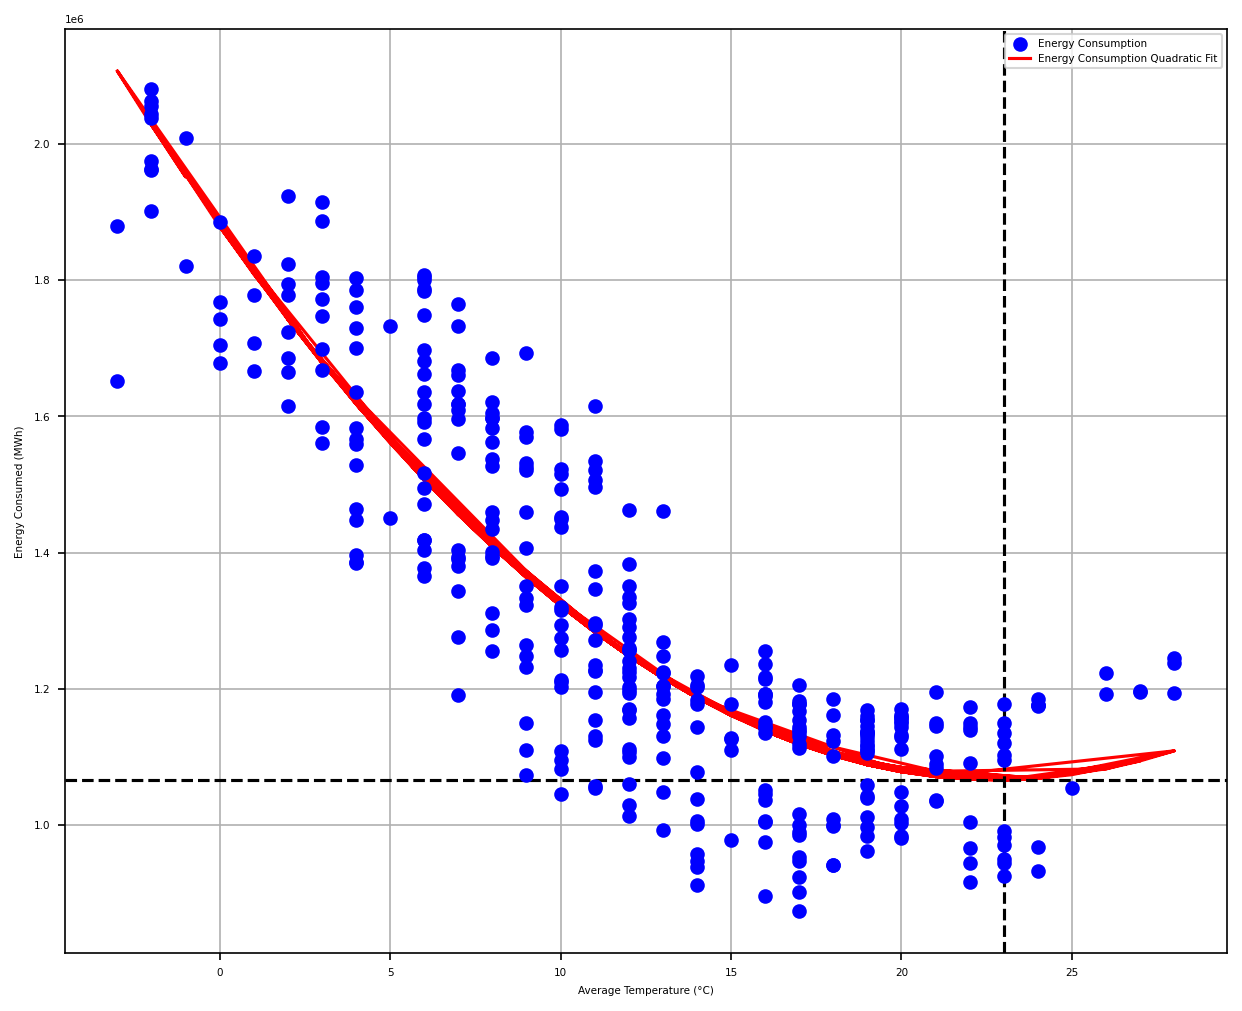

In [32]:
plt.figure(figsize=(10, 8),
          dpi = 150)

plt.scatter(consumption_vs_temp["avg Temp.\xa0(°C)"], consumption_vs_temp["Energie journalière (MWh)"],
            color = "blue",
           zorder = 3,
           label = "Energy Consumption")

plt.plot(consumption_vs_temp["avg Temp.\xa0(°C)"], consumption_fit,
         color = "red", label = "Energy Consumption Quadratic Fit")

# horizontal line at minimal consumption
plt.axhline(consumption_fit.min(),
            linestyle = "--",
            color = "black")

# vertical line for minimum temperature at minimum consumption
plt.axvline(consumption_vs_temp.iloc[146]["avg Temp.\xa0(°C)"],
           linestyle = "--",
           color = "black")

plt.xlabel("Average Temperature (°C)")
plt.ylabel("Energy Consumed (MWh)")
plt.grid(True, zorder = 0)

plt.legend()

plt.show()

In [33]:
# CODE I HAVE WRITTEN FOR DIAML ASSIGNMENT 4.

def fit_model(X, y):
    
    import statsmodels.api as sm
    
    return sm.OLS(y, X).fit()

def stepwise_regression(full_input_df, dependent_var, alpha_enter=0.05, alpha_exit=0.15):
    
    import statsmodels.api as sm
    
    # prepare independent and dependent variables
    independent_vars_df = full_input_df.drop(columns=[dependent_var])
    y = full_input_df[dependent_var]
    
    # initialize empty model and variables
    included_vars = []  # variables currently in the model
    excluded_vars = list(independent_vars_df.columns)  # variables not in the model yet
    best_model = None # initiating model
    best_included_vars = [] # best variables 
    
    # stepwise process: forward selection and backward elimination
    while excluded_vars or included_vars:
        
        # forward selection: add the best variable with lowest p_value in excluded_vars
        forward_step = False
        
        print(f"\n--- Forward Selection Step ---")
    
        for var in excluded_vars:
            
            # fit a model with the current included variables & the candidate variable
            X = sm.add_constant(independent_vars_df[included_vars + [var]])
            candidate_model = fit_model(X, y)
            p_value = candidate_model.pvalues[var] 
            
            print(f"Evaluating adding {var}: p-value = {p_value:}")
            
            # verify that pvalue is smaller than alpha_enter
            if p_value < alpha_enter:
                
                best_candidate = var
                best_candidate_model = candidate_model
                forward_step = True
                
                break 
        
        # add the best candidate if it improves the model
        
        if forward_step:
            included_vars.append(best_candidate)
            excluded_vars.remove(best_candidate)
            best_model = best_candidate_model
            best_included_vars = included_vars.copy()
            print(f"Added {best_candidate}.")
        else:
            print(f"No variables improved the model during forward selection.")
        
        # backward elimination: removes variables with high p_values 
        backward_step = False
        print(f"\n--- Backward Elimination Step ---")
        
        for var in included_vars.copy():
            X = sm.add_constant(independent_vars_df[included_vars])
            model = fit_model(X, y)
            
            # if any variable's p-value is higher than alpha_exit, remove from included_vars
            
            if model.pvalues[var] > alpha_exit:
                print(f"Evaluating removing {var}: p-value = {model.pvalues[var]:.4f}")
                included_vars.remove(var)
                backward_step = True
                
                # refit the model without the variable (using included_vars)
                best_model = fit_model(sm.add_constant(independent_vars_df[included_vars]), y)  
                best_included_vars = included_vars.copy()
                print(f"Removed {var} due to high p-value.")
        
        # re-check the p-values for all included variables after each backward step
        
        print(f"Re-checking p-values for included variables: {included_vars}")
        
        for var in included_vars.copy():
            
            X = sm.add_constant(independent_vars_df[included_vars])
            model = fit_model(X, y)
            print(f"{var}: p-value = {model.pvalues[var]:}")
        
        if not forward_step and not backward_step:
            
            # stop when neither adding nor removing variables improves the model
            
            print(f"No further improvement. Stopping the stepwise process.")
            break

    print(f"\nBest model variables: {best_included_vars}")
    return best_model, best_included_vars

In [34]:
paris_weather_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Events
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,5
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4,5
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0,10
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12,8
363,2017-12-30,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3,5


In [35]:
electricity_consumption

,Date,Energie journalière (MWh)
0,2017-01-01,1652084.0
1,2017-01-02,1768332.0
2,2017-01-03,1886120.0
3,2017-01-04,1923775.0
4,2017-01-05,1887470.0
...,...,...
360,2017-12-27,1582970.0
361,2017-12-28,1664743.0
362,2017-12-29,1668623.0
363,2017-12-30,1437082.0


In [36]:
# merging weather and electricity on date
full_frame = pd.merge(paris_weather_data, electricity_consumption)

In [37]:
# dropping date to prepare for regression
full_frame_no_date = full_frame.drop("Date", axis = 1)

In [38]:
# regressing
stepwise_model, stepwise_vars = stepwise_regression(full_frame_no_date, "Energie journalière (MWh)")


--- Forward Selection Step ---
Evaluating adding high Temp. (°C): p-value = 1.821514734255081e-93
Added high Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)']
high Temp. (°C): p-value = 1.821514734255081e-93

--- Forward Selection Step ---
Evaluating adding avg Temp. (°C): p-value = 0.00718768702510414
Added avg Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)', 'avg Temp.\xa0(°C)']
high Temp. (°C): p-value = 0.0005858665280424021
avg Temp. (°C): p-value = 0.00718768702510414

--- Forward Selection Step ---
Evaluating adding low Temp. (°C): p-value = 0.9716574860786544
Evaluating adding high Dew Point (°C): p-value = 0.04500558781218134
Added high Dew Point (°C).

--- Backward Elimination Step ---
Evaluating removing avg Temp. (°C): p-value = 0.5830
Removed avg Temp. (°C) due to high p-value.
Re-checking p-values for included variables: ['high Temp.\xa0(°C)'

In [39]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.749
Model:                                   OLS   Adj. R-squared:                  0.746
Method:                        Least Squares   F-statistic:                     214.4
Date:                       Mon, 27 Jan 2025   Prob (F-statistic):          1.84e-105
Time:                               15:31:46   Log-Likelihood:                -4841.3
No. Observations:                        365   AIC:                             9695.
Df Residuals:                            359   BIC:                             9718.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.861e+06   9.99e+05      3.866      0.000     1.9e+06    5.82e+06
high Humidity (%)          -2777.8743   1144.320     -2.428      0.016   -5028.288    -527.461
avg Dew Point (°C)         -3.216e+04   1484.957    -21.658      0.000   -3.51e+04   -2.92e+04
low Humidity (%)            6912.6621    594.060     11.636      0.000    5744.387    8080.938
high Visibility (km)       -5544.6043   1498.649     -3.700      0.000   -8491.838   -2597.370
avg Sea Level Press. (hPa) -2194.2994    958.803     -2.289      0.023   -4079.876    -308.723
==============================================================================
Omnibus:                        1.311   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.246
Skew:                           0.006   Prob(JB):                        0.536
Kurtosis:                       2.714   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# finding variables
variables = full_frame_no_date.columns.tolist()

In [41]:
# removing events
variables.remove("Events")

In [42]:
# removing dependent variables
variables.remove("Energie journalière (MWh)")

In [43]:
variables

['high Temp.\xa0(°C)',
 'avg Temp.\xa0(°C)',
 'low Temp.\xa0(°C)',
 'high Dew Point\xa0(°C)',
 'avg Dew Point\xa0(°C)',
 'low Dew Point\xa0(°C)',
 'high Humidity\xa0(%)',
 'avg Humidity\xa0(%)',
 'low Humidity\xa0(%)',
 'high Sea Level Press.\xa0(hPa)',
 'avg Sea Level Press.\xa0(hPa)',
 'low Sea Level Press.\xa0(hPa)',
 'high Visibility\xa0(km)',
 'avg Visibility\xa0(km)',
 'low Visibility\xa0(km)',
 'high Wind\xa0(km/h)',
 'avg Wind\xa0(km/h)',
 'sum Precip.\xa0(mm)']

In [44]:
for var in variables:
    
    full_frame_no_date[f"{var}^2"] = full_frame_no_date[var] ** 2

In [45]:
full_frame_no_date

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Humidity (%)^2,high Sea Level Press. (hPa)^2,avg Sea Level Press. (hPa)^2,low Sea Level Press. (hPa)^2,high Visibility (km)^2,avg Visibility (km)^2,low Visibility (km)^2,high Wind (km/h)^2,avg Wind (km/h)^2,sum Precip. (mm)^2
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,2,0,-2,1,1,-1,100,95,88,1030,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,1,0,-1,1,0,-1,100,95,88,1032,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,6,2,-1,4,1,-1,100,87,71,1028,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,7,3,1,2,0,-2,93,79,59,1038,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,6,2,-1,1,-1,-3,93,80,57,1011,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,8,3,-1,6,2,-1,100,85,54,1012,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,14,10,6,12,10,4,100,87,73,1011,...,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


In [46]:
# regressing for model 2
stepwise_model_squared, stepwise_vars_squared = stepwise_regression(full_frame_no_date, "Energie journalière (MWh)")


--- Forward Selection Step ---
Evaluating adding high Temp. (°C): p-value = 1.821514734255081e-93
Added high Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)']
high Temp. (°C): p-value = 1.821514734255081e-93

--- Forward Selection Step ---
Evaluating adding avg Temp. (°C): p-value = 0.00718768702510414
Added avg Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)', 'avg Temp.\xa0(°C)']
high Temp. (°C): p-value = 0.0005858665280424021
avg Temp. (°C): p-value = 0.00718768702510414

--- Forward Selection Step ---
Evaluating adding low Temp. (°C): p-value = 0.9716574860786544
Evaluating adding high Dew Point (°C): p-value = 0.04500558781218134
Added high Dew Point (°C).

--- Backward Elimination Step ---
Evaluating removing avg Temp. (°C): p-value = 0.5830
Removed avg Temp. (°C) due to high p-value.
Re-checking p-values for included variables: ['high Temp.\xa0(°C)'

In [47]:
stepwise_model_squared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.806
Model:                                   OLS   Adj. R-squared:                  0.802
Method:                        Least Squares   F-statistic:                     164.4
Date:                       Mon, 27 Jan 2025   Prob (F-statistic):          7.74e-121
Time:                               15:31:46   Log-Likelihood:                -4793.9
No. Observations:                        365   AIC:                             9608.
Df Residuals:                            355   BIC:                             9647.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.495e+08   5.56e+07      2.689      0.007    4.02e+07    2.59e+08
avg Dew Point (°C)           -3.963e+04   5036.042     -7.869      0.000   -4.95e+04   -2.97e+04
low Humidity (%)              8203.5338    732.887     11.193      0.000    6762.188    9644.879
avg Sea Level Press. (hPa)   -2.826e+05    1.1e+05     -2.577      0.010   -4.98e+05   -6.69e+04
avg Visibility (km)          -3185.4057   1847.275     -1.724      0.086   -6818.383     447.572
avg Temp. (°C)^2               697.3518    198.005      3.522      0.000     307.941    1086.763
low Temp. (°C)               -1.938e+04   5284.804     -3.668      0.000   -2.98e+04   -8990.240
low Sea Level Press. (hPa)   -8298.3052   3267.101     -2.540      0.012   -1.47e+04   -1873.000
low Temp. (°C)^2               693.8453    303.566      2.286      0.023      96.831    1290.860
avg Sea Level Press. (hPa)^2   142.6325     54.006      2.641      0.009      36.421     248.844
==============================================================================
Omnibus:                        1.956   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.791
Skew:                          -0.169   Prob(JB):                        0.408
Kurtosis:                       3.061   Cond. No.                     8.87e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# date to day name
full_frame_no_date["Day"] = full_frame["Date"].dt.day_name()

In [49]:
full_frame_no_date

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,high Sea Level Press. (hPa)^2,avg Sea Level Press. (hPa)^2,low Sea Level Press. (hPa)^2,high Visibility (km)^2,avg Visibility (km)^2,low Visibility (km)^2,high Wind (km/h)^2,avg Wind (km/h)^2,sum Precip. (mm)^2,Day
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0,Sunday
1,2,0,-2,1,1,-1,100,95,88,1030,...,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4,Monday
2,1,0,-1,1,0,-1,100,95,88,1032,...,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0,Tuesday
3,6,2,-1,4,1,-1,100,87,71,1028,...,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4,Wednesday
4,7,3,1,2,0,-2,93,79,59,1038,...,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,996004,974169,964324,961.0,144.0,36.0,1521,576,16,Wednesday
361,6,2,-1,1,-1,-3,93,80,57,1011,...,1022121,1010025,998001,961.0,256.0,100.0,361,169,0,Thursday
362,8,3,-1,6,2,-1,100,85,54,1012,...,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144,Friday
363,14,10,6,12,10,4,100,87,73,1011,...,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9,Saturday


In [50]:
full_frame_no_date

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,high Sea Level Press. (hPa)^2,avg Sea Level Press. (hPa)^2,low Sea Level Press. (hPa)^2,high Visibility (km)^2,avg Visibility (km)^2,low Visibility (km)^2,high Wind (km/h)^2,avg Wind (km/h)^2,sum Precip. (mm)^2,Day
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0,Sunday
1,2,0,-2,1,1,-1,100,95,88,1030,...,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4,Monday
2,1,0,-1,1,0,-1,100,95,88,1032,...,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0,Tuesday
3,6,2,-1,4,1,-1,100,87,71,1028,...,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4,Wednesday
4,7,3,1,2,0,-2,93,79,59,1038,...,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,996004,974169,964324,961.0,144.0,36.0,1521,576,16,Wednesday
361,6,2,-1,1,-1,-3,93,80,57,1011,...,1022121,1010025,998001,961.0,256.0,100.0,361,169,0,Thursday
362,8,3,-1,6,2,-1,100,85,54,1012,...,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144,Friday
363,14,10,6,12,10,4,100,87,73,1011,...,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9,Saturday


In [51]:
# day name to dummy variables
full_frame_no_date = pd.get_dummies(full_frame_no_date, columns=["Day"], drop_first=True)

In [52]:
full_frame_no_date

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Visibility (km)^2,high Wind (km/h)^2,avg Wind (km/h)^2,sum Precip. (mm)^2,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,0.0,100,36,0,False,False,True,False,False,False
1,2,0,-2,1,1,-1,100,95,88,1030,...,0.0,256,36,4,True,False,False,False,False,False
2,1,0,-1,1,0,-1,100,95,88,1032,...,0.0,196,36,0,False,False,False,False,True,False
3,6,2,-1,4,1,-1,100,87,71,1028,...,9.0,529,196,4,False,False,False,False,False,True
4,7,3,1,2,0,-2,93,79,59,1038,...,100.0,196,121,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,36.0,1521,576,16,False,False,False,False,False,True
361,6,2,-1,1,-1,-3,93,80,57,1011,...,100.0,361,169,0,False,False,False,True,False,False
362,8,3,-1,6,2,-1,100,85,54,1012,...,9.0,1024,169,144,False,False,False,False,False,False
363,14,10,6,12,10,4,100,87,73,1011,...,9.0,1024,361,9,False,True,False,False,False,False


In [53]:
# getting errors in boolean format so transforming it into 0 and 1
for var in full_frame_no_date.columns:
    
    if "Day" in var:
        
        full_frame_no_date[var] = full_frame_no_date[var].astype(int)
        
full_frame_no_date

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Visibility (km)^2,high Wind (km/h)^2,avg Wind (km/h)^2,sum Precip. (mm)^2,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,0.0,100,36,0,0,0,1,0,0,0
1,2,0,-2,1,1,-1,100,95,88,1030,...,0.0,256,36,4,1,0,0,0,0,0
2,1,0,-1,1,0,-1,100,95,88,1032,...,0.0,196,36,0,0,0,0,0,1,0
3,6,2,-1,4,1,-1,100,87,71,1028,...,9.0,529,196,4,0,0,0,0,0,1
4,7,3,1,2,0,-2,93,79,59,1038,...,100.0,196,121,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,6,4,3,5,2,-2,93,82,60,998,...,36.0,1521,576,16,0,0,0,0,0,1
361,6,2,-1,1,-1,-3,93,80,57,1011,...,100.0,361,169,0,0,0,0,1,0,0
362,8,3,-1,6,2,-1,100,85,54,1012,...,9.0,1024,169,144,0,0,0,0,0,0
363,14,10,6,12,10,4,100,87,73,1011,...,9.0,1024,361,9,0,1,0,0,0,0


In [54]:
# regressing for model 3
stepwise_model_squared_day, stepwise_vars_squared_day = stepwise_regression(full_frame_no_date, "Energie journalière (MWh)")


--- Forward Selection Step ---
Evaluating adding high Temp. (°C): p-value = 1.821514734255081e-93
Added high Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)']
high Temp. (°C): p-value = 1.821514734255081e-93

--- Forward Selection Step ---
Evaluating adding avg Temp. (°C): p-value = 0.00718768702510414
Added avg Temp. (°C).

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['high Temp.\xa0(°C)', 'avg Temp.\xa0(°C)']
high Temp. (°C): p-value = 0.0005858665280424021
avg Temp. (°C): p-value = 0.00718768702510414

--- Forward Selection Step ---
Evaluating adding low Temp. (°C): p-value = 0.9716574860786544
Evaluating adding high Dew Point (°C): p-value = 0.04500558781218134
Added high Dew Point (°C).

--- Backward Elimination Step ---
Evaluating removing avg Temp. (°C): p-value = 0.5830
Removed avg Temp. (°C) due to high p-value.
Re-checking p-values for included variables: ['high Temp.\xa0(°C)'

In [55]:
stepwise_model_squared_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.887
Model:                                   OLS   Adj. R-squared:                  0.882
Method:                        Least Squares   F-statistic:                     182.0
Date:                       Mon, 27 Jan 2025   Prob (F-statistic):          1.09e-154
Time:                               15:31:48   Log-Likelihood:                -4696.3
No. Observations:                        365   AIC:                             9425.
Df Residuals:                            349   BIC:                             9487.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.097e+08   4.32e+07      2.542      0.011    2.48e+07    1.95e+08
avg Dew Point (°C)           -3.609e+04   5221.610     -6.911      0.000   -4.64e+04   -2.58e+04
low Humidity (%)              6056.9204    899.899      6.731      0.000    4287.014    7826.827
avg Sea Level Press. (hPa)   -2.067e+05   8.51e+04     -2.430      0.016   -3.74e+05   -3.94e+04
avg Visibility (km)          -2782.0619   1506.678     -1.846      0.066   -5745.373     181.249
avg Temp. (°C)^2               848.7197    168.982      5.023      0.000     516.369    1181.070
low Temp. (°C)               -2.592e+04   5084.180     -5.099      0.000   -3.59e+04   -1.59e+04
low Sea Level Press. (hPa)   -5525.3524   2632.787     -2.099      0.037   -1.07e+04    -347.227
low Temp. (°C)^2               627.2162    245.016      2.560      0.011     145.323    1109.109
avg Sea Level Press. (hPa)^2   103.6840     41.904      2.474      0.014      21.269     186.099
Day_Saturday                 -1.498e+05    1.5e+04    -10.007      0.000   -1.79e+05    -1.2e+05
Day_Sunday                   -2.036e+05    1.5e+04    -13.606      0.000   -2.33e+05   -1.74e+05
avg Wind (km/h)               4029.9360   1363.958      2.955      0.003    1347.325    6712.547
sum Precip. (mm)             -7054.4764   2240.635     -3.148      0.002   -1.15e+04   -2647.631
avg Humidity (%)^2              25.8030     11.794      2.188      0.029       2.606      49.000
Day_Monday                   -4.128e+04   1.51e+04     -2.734      0.007    -7.1e+04   -1.16e+04
==============================================================================
Omnibus:                        5.193   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.989
Skew:                          -0.148   Prob(JB):                       0.0501
Kurtosis:                       3.553   Cond. No.                     8.92e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# preparing overfitting analysis
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold

In [57]:
X = full_frame_no_date[stepwise_vars_squared_day]
X = sm.add_constant(X)
y = full_frame_no_date["Energie journalière (MWh)"]

model = sm.OLS(y, X).fit()

In [58]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores = []

# perform manual cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit OLS model on training data
    model = sm.OLS(y_train, X_train).fit()

    # predict on test set
    y_pred = model.predict(X_test)

    # compute R^2 score
    r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
    r2_scores.append(r2)

print("Cross-Validation R² Scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

Cross-Validation R² Scores: [0.8713245884056604, 0.8987936760927481, 0.9204623566366454, 0.9327776313685638, 0.8574249394795141, 0.8413617282697086, 0.8501561911001807, 0.7934521437725884, 0.8436590588356765, 0.8893128319309561]
Mean R²: 0.8698725145892242


In [59]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ridge regression (L2)
ridge = Ridge(alpha=1.0)  # higher alpha = more regularization
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

# lasso regression (L1)
lasso = Lasso(alpha=0.1)  # higher alpha = more feature elimination
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))

Ridge R²: 0.8775892950369358
Lasso R²: 0.8765378000952952


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+12, tolerance: 2.177e+09
  model = cd_fast.enet_coordinate_descent(


In [60]:
# Report Deliverables

# 1. Heatmap
# 2. Scatterplot consumption vs temperature
# 3. quadratic fit for consumption vs temperature
# 4. Optimal temperature for minimal consumption
# 5. Model1: Stepwise Regression, Selected variables, R^2
# 6. Model2: Stepwise Regression, Selected variables, R^2
# 7. Model3: Stepwise Regression, Selected variables, R^2
# 8. Preventing overfitting